In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import matplotlib.patches as mpatches
from itertools import combinations

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))


In [22]:
phase2_collection = unpickle_this('phase2collection.pkl')
phase2_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, timebin = 100, ignore_freq = 0.5)

All set to analyze


# Parameter EDA

In [23]:
#NEEDS TO BE REDONE WITH SMOOTHING WINDOW UPDATES
            #offset included                     offset excluded
# 3, 5, -2 =      76                                   84
# 1 , 5, -2 =     84                                   76
# 2, 5, -2 =      82                                   80                               
# 2, 4, 0 =       82                                   
# 3, 4 , -1 =     65                                   73
# 2, 4, -1 =      71                                   82
# 3, 4, 0 =       74
# 3, 3, 0 =       70
# 2, 3, 0 =       69
# 2, 4, 1 =       69

In [24]:
equalize = 2
baseline_window = 2
offset = 0
print(phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)


Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
(1.514114627887083, 0.18013445091188457, [[30, 167], [21, 177]])
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples


(0.6526915113871635, 0.28411071417320377, [[13, 184], [21, 194]])

# Grouping cells for pie chart

needs to be checked to see whether if a neuron has one Nan (since wilcoxon update from tyler does compute P value for copmarisons with less than 6 of an event type), whether that neuron is thrown out completely or is listed as insignificant for the Nan comparisons if it can be computed for some of the comparisons. 

also you need to think about which way makes more sense to do

In [25]:
for event in ['cagemate', 'novel', 'recall', 'acquisition']:
    phase2_analysis.wilcox_baseline_v_event_collection(event, equalize, baseline_window, offset, save = True, plot = False)

Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples


In [26]:
phase2_collection.wilcox_dfs
df_list = []
for comparison in ['2s novel vs 2s baseline', '2s cagemate vs 2s baseline', '2s recall vs 2s baseline', '2s acquisition vs 2s baseline']:
    df = phase2_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    if is_first:
        master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
    
master_df 

C:\Users\megha\AppData\Local\Temp\ipykernel_4572\2816157337.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'event1 vs event2_x', 'Event_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')


,Subject,Recording,original unit id,Event_x,event1 vs event2_x,Event_y,event1 vs event2_y,Event_x,event1 vs event2_x,Event_y,event1 vs event2_y
0,1.1,20230803_101331_1_merged.rec,0,2s novel vs 2s baseline,NaN,NaN,NaN,2s recall vs 2s baseline,NaN,NaN,NaN
1,1.4,20230803_121318_1_merged.rec,26,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
2,1.4,20230803_121318_1_merged.rec,92,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
3,1.4,20230803_121318_1_merged.rec,7,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
4,1.4,20230803_121318_1_merged.rec,100,2s novel vs 2s baseline,increases,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
...,...,...,...,...,...,...,...,...,...,...,...
193,1.4,20230818_133620_1_merged.rec,101,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
194,1.4,20230818_133620_1_merged.rec,50,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,not significant,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
195,1.4,20230818_133620_1_merged.rec,74,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,decreases,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant
196,1.4,20230818_133620_1_merged.rec,107,2s novel vs 2s baseline,not significant,2s cagemate vs 2s baseline,increases,2s recall vs 2s baseline,not significant,2s acquisition vs 2s baseline,not significant


In [27]:
master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs baseline',
 'Event_y',
 'cagemate vs baseline',
 'Event_x',
 'familiar vs baseline',
 'Event_y',
 'acquisition vs baseline']
master_df = master_df[['original unit id',
 'novel vs baseline',
 'cagemate vs baseline',
 'familiar vs baseline',
 'acquisition vs baseline']]
master_df

,original unit id,novel vs baseline,cagemate vs baseline,familiar vs baseline,acquisition vs baseline
0,0,NaN,NaN,NaN,NaN
1,26,not significant,not significant,not significant,not significant
2,92,not significant,not significant,not significant,not significant
3,7,not significant,not significant,not significant,not significant
4,100,increases,not significant,not significant,not significant
...,...,...,...,...,...
193,101,not significant,not significant,not significant,not significant
194,50,not significant,not significant,not significant,not significant
195,74,not significant,decreases,not significant,not significant
196,107,not significant,increases,not significant,not significant


In [28]:
def group_cells(novel, cagemate, fam, acquisition):
    group = ''
    if (novel == 'increases') or (novel == 'decreases'):
        group = 'novel'
    if (cagemate == 'increases') or (cagemate == 'decreases'):
        group = group + 'cagemate' 
    if (fam == 'increases') or (fam == 'decreases'):
        group = group + 'fam'
    if (acquisition == 'increases') or (acquisition == 'decreases'):
        group = group + 'acquisition'
    return group

master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline'],
                                                                  row['cagemate vs baseline'],
                                                                  row['familiar vs baseline'],
                                                                  row['acquisition vs baseline']), axis = 1)
results = master_df.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_4572\2096176807.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline'],


,original unit id,novel vs baseline,cagemate vs baseline,familiar vs baseline,acquisition vs baseline
cell group,,,,,
,135,134,117,134,134
acquisition,11,11,11,11,11
cagemate,12,12,12,12,12
cagemateacquisition,1,1,1,1,1
cagematefam,1,1,1,1,1
cagematefamacquisition,2,2,2,2,2
fam,5,5,5,5,5
famacquisition,1,1,1,1,1
novel,21,21,21,21,21


In [29]:
percents = results['original unit id'] / results['original unit id'].sum()
percents

cell group
                            0.681818
acquisition                 0.055556
cagemate                    0.060606
cagemateacquisition         0.005051
cagematefam                 0.005051
cagematefamacquisition      0.010101
fam                         0.025253
famacquisition              0.005051
novel                       0.106061
novelacquisition            0.005051
novelcagemate               0.010101
novelcagemateacquisition    0.010101
novelcagematefam            0.005051
novelfam                    0.005051
novelfamacquisition         0.010101
Name: original unit id, dtype: float64

In [30]:
results['original unit id'].sum()

198

In [69]:
fractions = np.array([243,22,25,3,2,2,17,6,30,2,2,2,1,6,2])
percents_1 = fractions / fractions.sum()
percents_df = pd.DataFrame(index = percents.index, data = percents_1*100, columns = ['percentage'])

sorted_df = percents_df.sort_values(by = 'percentage', ascending = False)
sorted_df

,percentage
cell group,
,66.575342
novel,8.219178
cagemate,6.849315
acquisition,6.027397
fam,4.657534
famacquisition,1.643836
novelfam,1.643836
cagemateacquisition,0.821918
cagematefam,0.547945


# Plotting

These are old example neurons, new ones will have to be found

Wilcoxon can't be done on 20230803_121318_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


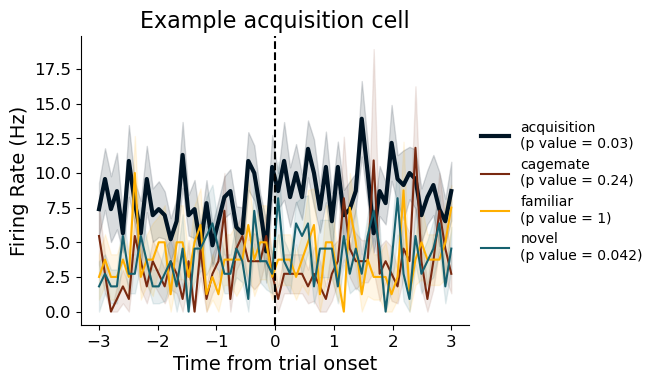

Wilcoxon can't be done on 20230803_121318_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


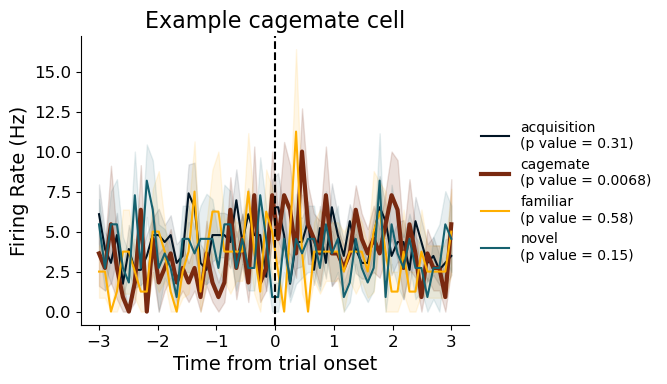

Wilcoxon can't be done on 20230803_121318_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


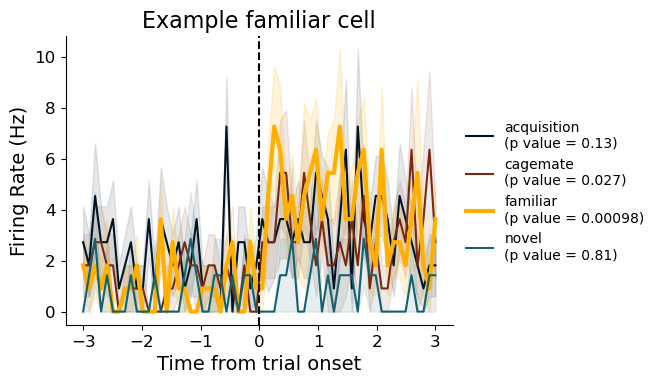

Wilcoxon can't be done on 20230803_121318_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230818_115728_1_merged.rec cagemate, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec recall, because <6 samples
Wilcoxon can't be done on 20230803_101331_1_merged.rec novel, because <6 samples


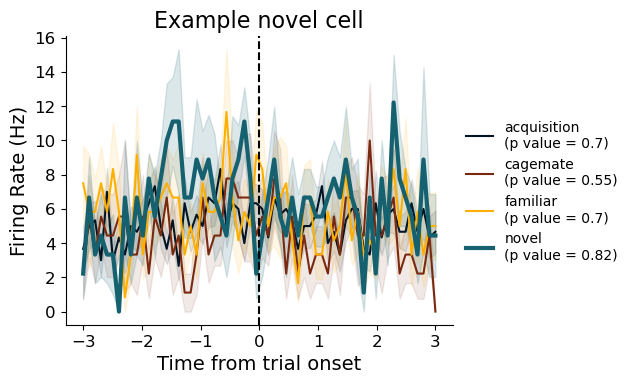

In [14]:
color_dict = {'cagemate':hex_2_rgb('#792910'), 'novel':hex_2_rgb('#15616F'),
              'recall':hex_2_rgb('#FFAF00'), 'acquisition':hex_2_rgb('#001424') }
def wilcox_baseline_v_event_unit(
    recording_name, unit_id, events,
    equalize, baseline_window, offset, title, highlight, exclude_offset=False,
    
):
    """
    plots event triggered average firing rates for units with significant
    wilcoxon signed rank tests (p value <0.05) for event v baseline window.

    Args(4 total, 4 required):
        events: list of str, event types of which ehpys snippets happen during
        equalize: float, length (s) of events used by padding with post
            event time or trimming events all to equalize (s) long used
        baseline_window: int, default=0, seconds prior to start of event
        offset: int, adjusts end of baseline by offset(s) from onset of
            behavior such that offset=2 adds the first two seconds of event
            data into baseline while offest=-2 removes them from baseline
            averages

    Returns:
        none
    """
    plt.figure(figsize=(5, 3.75))
    recording = phase2_analysis.ephyscollection.get_by_name(recording_name)
    for event in events:
        if event == highlight:
            linewidth = 3
            alpha = .15
        else:
            linewidth = 1.5
            alpha = .1
        temp_master_df = phase2_analysis.wilcox_baseline_v_event_collection(
            event,
            equalize,
            baseline_window,
            offset,
            exclude_offset,
            plot=False,
            save=False)
        master_df = temp_master_df[(temp_master_df['Recording'] ==
                                    recording_name) & (
                                        temp_master_df['original unit id']
                                        == unit_id)]
        master_df = master_df.reset_index()
        unit_event_firing_rates = phase2_analysis.__get_unit_event_firing_rates__(
            recording,
            event,
            equalize,
            baseline_window,
            0)
        mean_arr = np.mean(unit_event_firing_rates[unit_id], axis=0)
        sem_arr = sem(unit_event_firing_rates[unit_id], axis=0)
        p_value = master_df["p value"].values[0]
        x = np.linspace(
            start=-baseline_window, stop=equalize, num=len(mean_arr)
        )
        title_p = "{:.2g}".format(p_value)
        if event != 'recall':
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'{event}\n(p value = {title_p})')
        else:
            plt.plot(x, mean_arr, c=color_dict[event], linewidth=linewidth, label = f'familiar\n(p value = {title_p})')
        plt.fill_between(
            x, mean_arr - sem_arr, mean_arr + sem_arr, alpha=alpha,
            color = color_dict[event])
    if offset != 0:
        plt.axvline(x=offset, color='r', linestyle='--')
    plt.axvline(x=0, color="k", linestyle="--")   
    plt.title(title, fontsize = 16)
    plt.legend(bbox_to_anchor = (1,.75), frameon = False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Time from trial onset', fontsize=14)
    plt.ylabel('Firing Rate (Hz)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 6, 
                            ['acquisition', 'cagemate', 'recall', 'novel'], 
                            3, 3, 0, 'Example acquisition cell',
                            'acquisition')
wilcox_baseline_v_event_unit('20230804_141009_1_merged.rec', 147, 
                             ['acquisition', 'cagemate', 'recall', 'novel'], 
                             3, 3, 0, 'Example cagemate cell',
                             'cagemate')
wilcox_baseline_v_event_unit('20230804_121600_1_merged.rec', 19,
                            ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0, 'Example familiar cell',
                               'recall')
wilcox_baseline_v_event_unit('20230803_141047_1_merged.rec', 50, 
                             ['acquisition', 'cagemate', 'recall', 'novel'],
                               3, 3, 0,'Example novel cell',
                               'novel')